<a href="https://colab.research.google.com/github/Gyanendra079/Restaurant-Market-Analysis/blob/main/Restaurant_Market_Analysis(Cognifyz_Technology_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Restaurants Dataset using Data frames packages like pandas, for visualization matplotlib and seasborn with sklearn for data preprocessing and build ML Model for the business.

#Level 1

##Task 1 Data Exploration and Preprocessing

Explore the dataset identify the numbers of rows and columns

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# No of Rows and columns
df.shape

(9551, 21)

Check for missing values in each column and handle them accordingly

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

Perform data type conversion if necessary.

In [ ]:
df["Cuisines"].fillna("Unknown", inplace=True)

<ipython-input-9-b6e89fa079d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna("Unknown", inplace=True)


Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [ ]:
# find the class impbalance in aggregate rating
df_new = df['Aggregate rating'].value_counts()

In [ ]:
print(df_new)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


<ipython-input-12-d7ba2ce39f91>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate Rating', y='Count',data=data, palette="viridis")


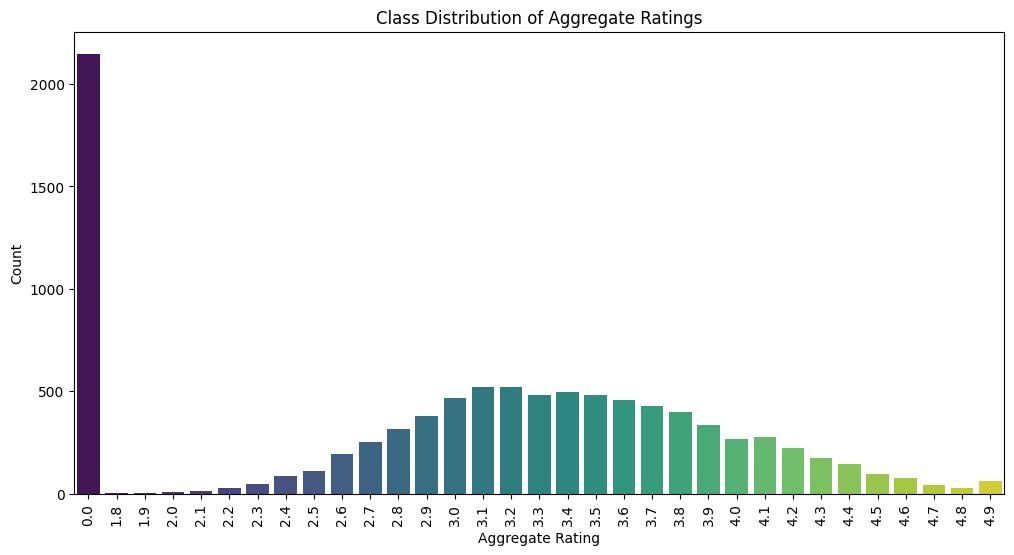

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with given values
data = pd.DataFrame({'Aggregate Rating': df_new.index, 'Count': df_new.values})

# Sort DataFrame by 'Aggregate Rating'
data = data.sort_values(by='Aggregate Rating')

# Print class distribution
print(df_new)

# Plot bar chart of class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate Rating', y='Count',data=data, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Class Distribution of Aggregate Ratings")
plt.show()

#Task 2

# Descriptive Analysis







Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [ ]:
# Numericals columns are Votes/Aggregate rating/ Price range/Average Cost for two
print('For Average Cost for two')
print('Mean is',df['Average Cost for two'].mean())
print('Median is',df['Average Cost for two'].median())
print('Standard deviation is',df['Average Cost for two'].std())

For Average Cost for two
Mean is 1199.2107632708617
Median is 400.0
Standard deviation is 16121.18307349965


In [ ]:
print('For Price range')
print('Mean is',df['Price range'].mean())
print('Median is',df['Price range'].median())
print('Standard deviation is',df['Price range'].std())

For Price range
Mean is 1.804837189823055
Median is 2.0
Standard deviation is 0.9056088473975366


In [ ]:
print('For Aggregate rating')
print('Mean is',df['Aggregate rating'].mean())
print('Median is',df['Aggregate rating'].median())
print('Standard deviation is',df['Aggregate rating'].std())

For Aggregate rating
Mean is 2.66637001361114
Median is 3.2
Standard deviation is 1.5163775396521686


In [ ]:
print('For Votes')
print('Mean is',df['Votes'].mean())
print('Median is',df['Votes'].median())
print('Standard deviation is',df['Votes'].std())

For Votes
Mean is 156.909747670401
Median is 31.0
Standard deviation is 430.1691453762977


Explore the distribution of categorical
variables like "Country Code","City",and "Cuisines".

Identify the top cuisines and cities with the
highest number of restaurants.

<ipython-input-17-2439894c914e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


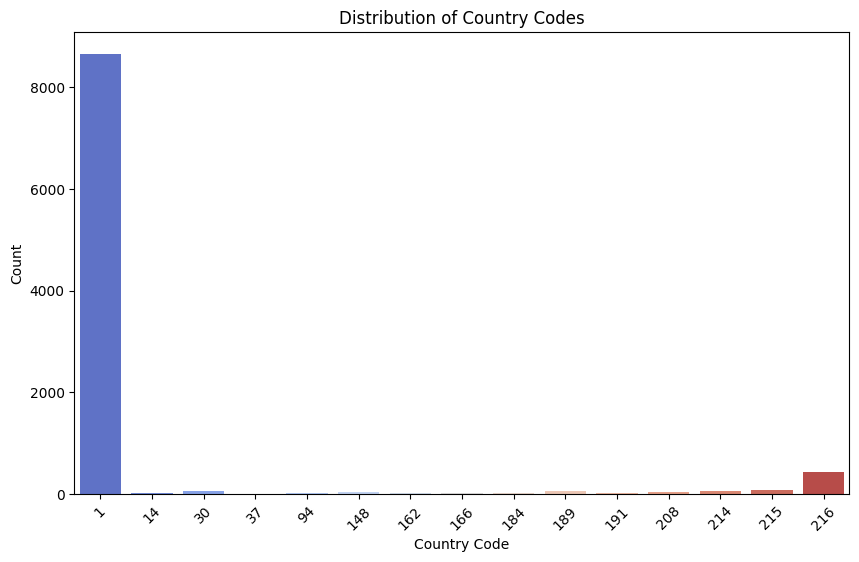

In [ ]:
# Count unique values
country_counts = df["Country Code"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Distribution of Country Codes")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-45a7bb8f7151>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")


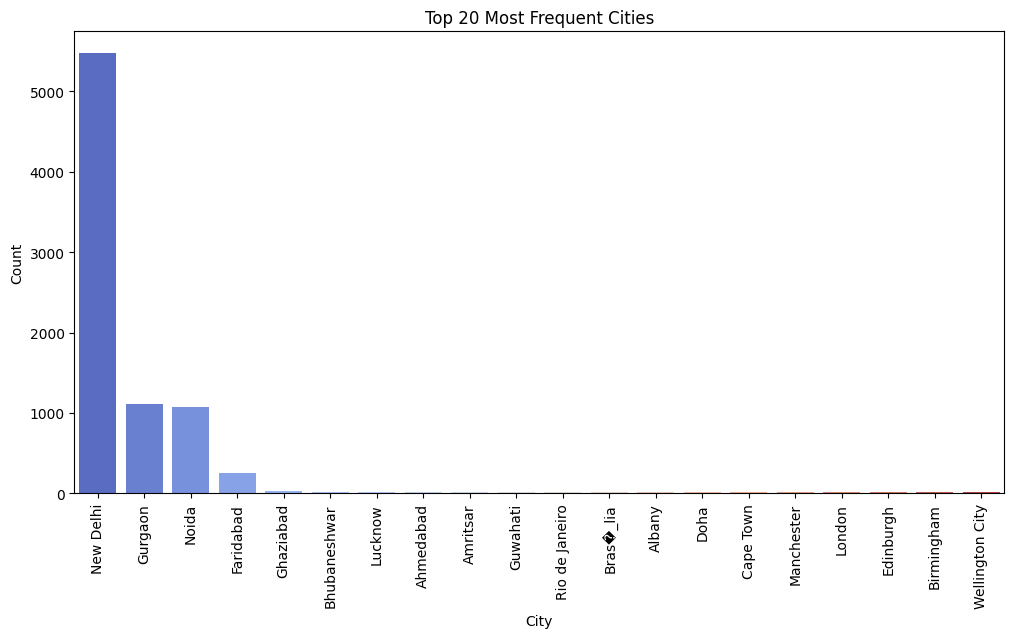

In [ ]:
plt.figure(figsize=(12, 6))
top_cities = df['City'].value_counts().nlargest(20)  # Get top 20 cities
sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

<ipython-input-19-f9d2ff54825a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="coolwarm")


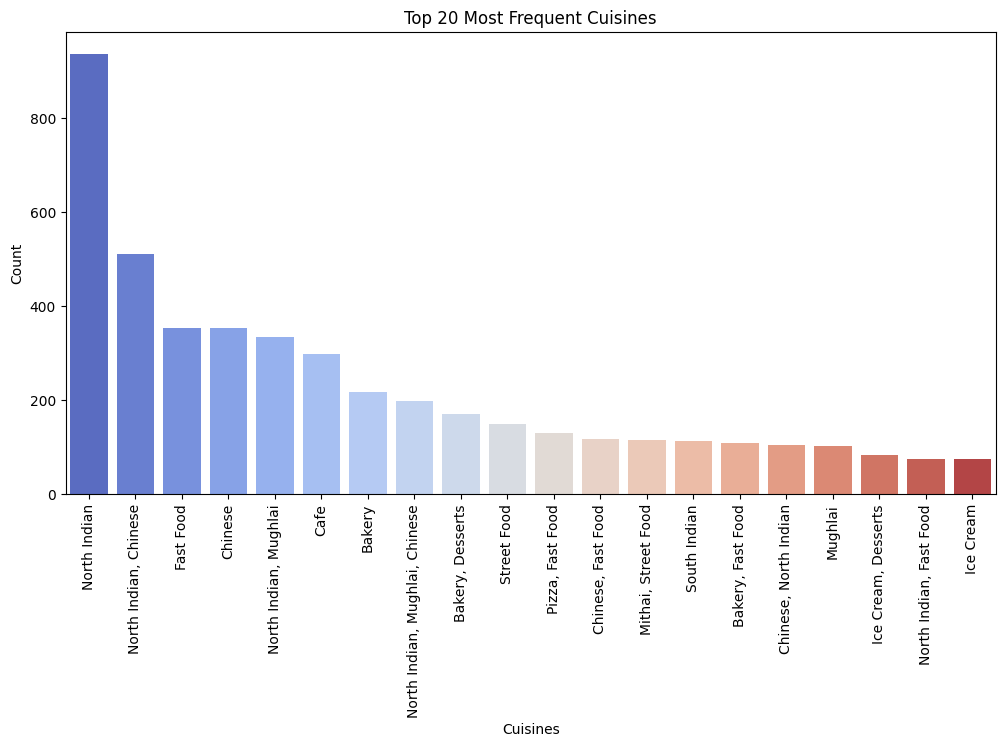

In [ ]:
plt.figure(figsize=(12, 6))
top_cuisines = df['Cuisines'].value_counts().nlargest(20)  # Get top 20 cities
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.show()

<ipython-input-20-9ecaea0ca751>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


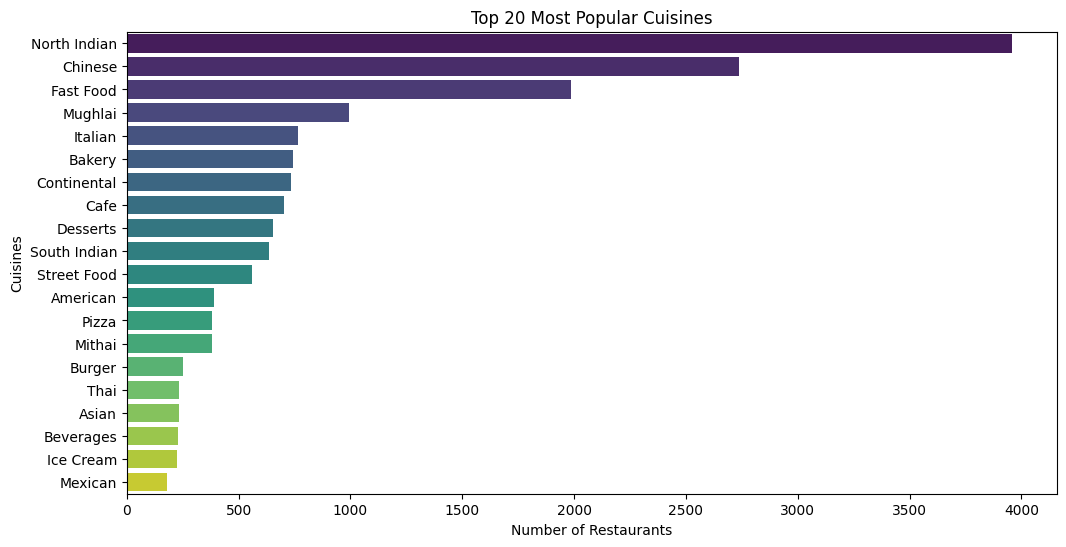

In [ ]:
df['Cuisines'] = df['Cuisines'].dropna().astype(str)  # Ensure no NaN values
cuisine_list = df['Cuisines'].str.split(', ').explode()  # Split and expand into rows

# Count the most popular cuisines
top_cuisines = cuisine_list.value_counts().nlargest(20)  # Top 20 cuisines

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.title("Top 20 Most Popular Cuisines")
plt.show()

#Task 3

#Geospatial Analysis

Visualize the locations of restaurants on a map using latitude and longitude information.

In [ ]:
import plotly.express as px

# Load and clean dataset
df = df.dropna(subset=['Latitude', 'Longitude'])

# Optional sample
df_sample = df.sample(1000, random_state=42)

# Plot using Plotly
fig = px.scatter_mapbox(
    df_sample,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data=["City", "Cuisines"],
    color_discrete_sequence=["red"],
    zoom=3,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Analyze the distribution of restaurants across different cities or countries.

In [ ]:
# Count restaurants per city
city_counts = df["City"].value_counts()

# Display top 10 cities
print("Top 10 Cities with Most Restaurants:")
print(city_counts.head(10))

Top 10 Cities with Most Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


<ipython-input-23-2cbcdd15a970>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




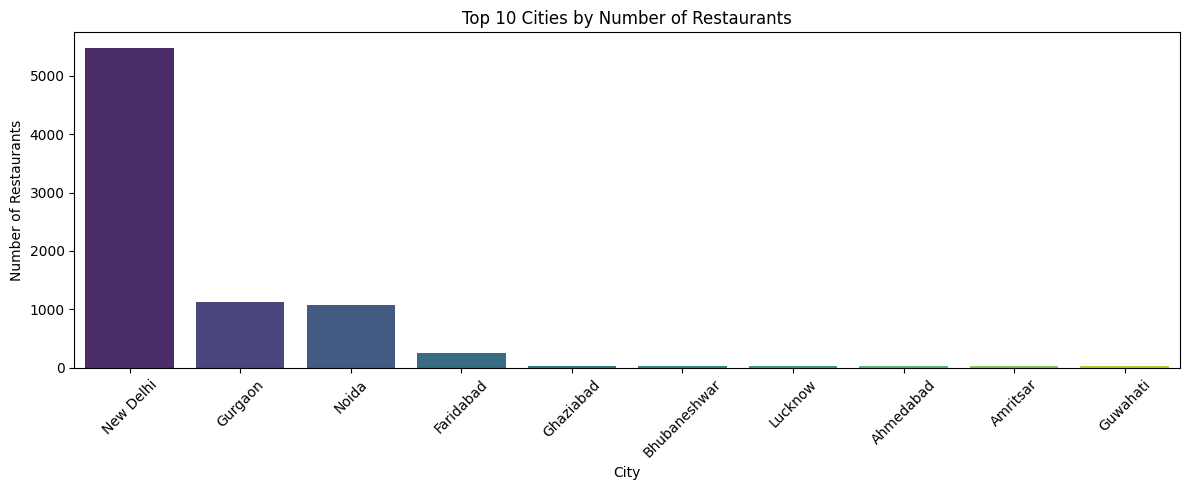

In [ ]:
#  Bar Plot for Top 10 Cities
plt.figure(figsize=(12, 5))
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette="viridis")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
country_mapping = {
    1: "India", 14: "Australia", 30: "Brazil", 37: "Canada", 94: "Indonesia",
    148: "New Zealand", 162: "Philippines", 166: "Qatar", 184: "Singapore",
    189: "South Africa", 191: "Sri Lanka", 208: "Turkey", 214: "UAE",
    215: "United Kingdom", 216: "United States"
}

df["Country"] = df["Country Code"].map(country_mapping)

In [ ]:
country_counts = df["Country"].value_counts()

print("Number of Restaurants by Country:")
print(country_counts)

Number of Restaurants by Country:
Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Philippines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


<ipython-input-26-4c9aa5098588>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




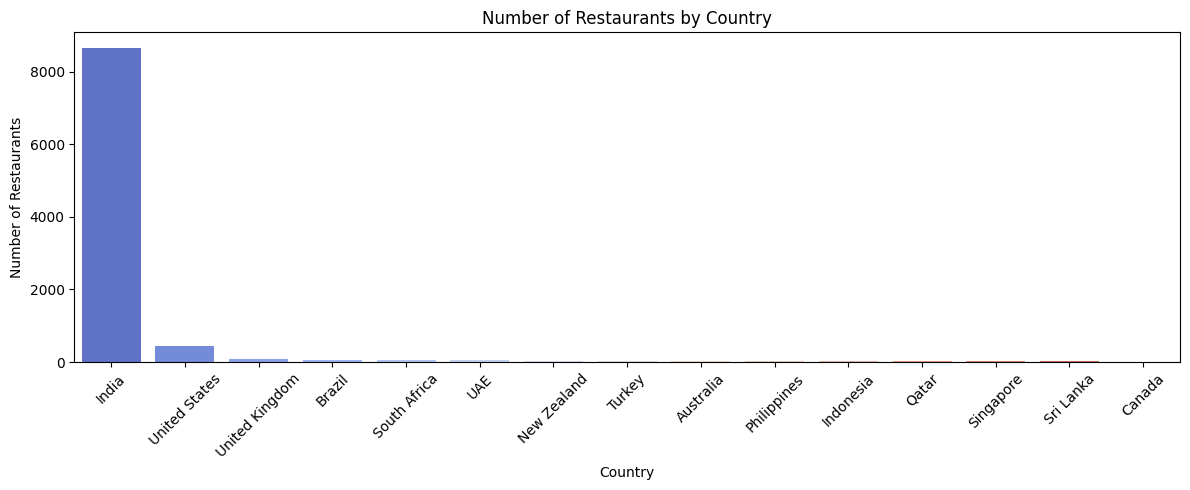

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Number of Restaurants by Country")
plt.xlabel("Country")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cities like New Delhi, Gurgoan and Noida have the highest number of entries since India is the dominant country in the given dataset.

Countries like India, United States, and United Kingdom lead in restaurant count.

Determine if there is any correlation between the restaurant's location and its rating.

In [ ]:
# Average rating per city (only showing cities with sufficient data)
city_rating = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

print("Top 10 Cities by Average Rating:")
print(city_rating.head(10))

Top 10 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


<ipython-input-28-26889b84246a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




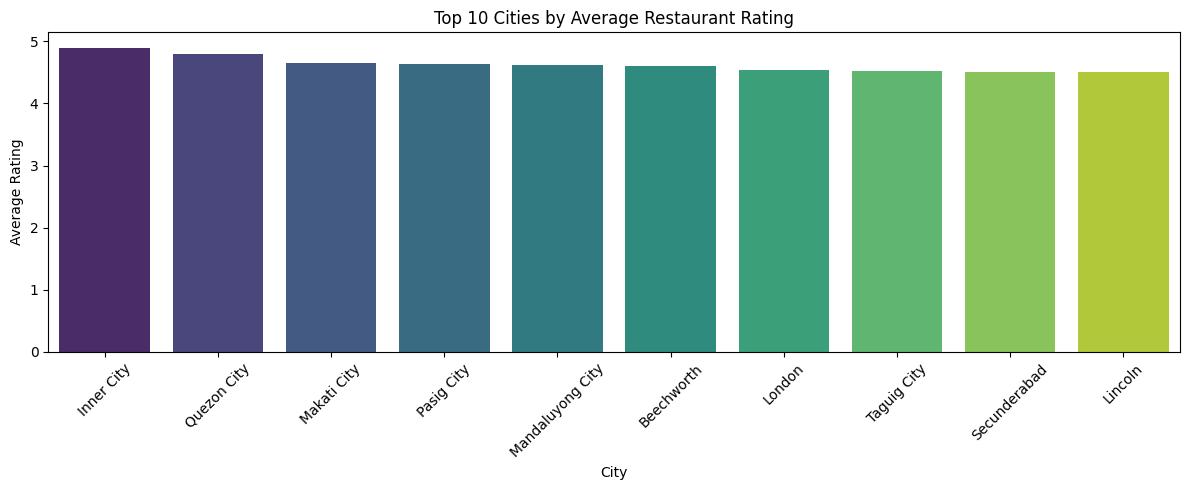

In [ ]:
# Visualize Top Cities
top_cities = city_rating.head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# Average Rating by Country
country_rating = df.groupby("Country")["Aggregate rating"].mean().sort_values(ascending=False)

print("Average Rating by Country:")
print(country_rating)

Average Rating by Country:
Country
Philippines       4.468182
Turkey            4.300000
Indonesia         4.295238
New Zealand       4.262500
UAE               4.233333
South Africa      4.210000
United Kingdom    4.087500
Qatar             4.060000
United States     4.004378
Sri Lanka         3.870000
Brazil            3.763333
Australia         3.658333
Canada            3.575000
Singapore         3.575000
India             2.523324
Name: Aggregate rating, dtype: float64


<ipython-input-30-84c2b263d578>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




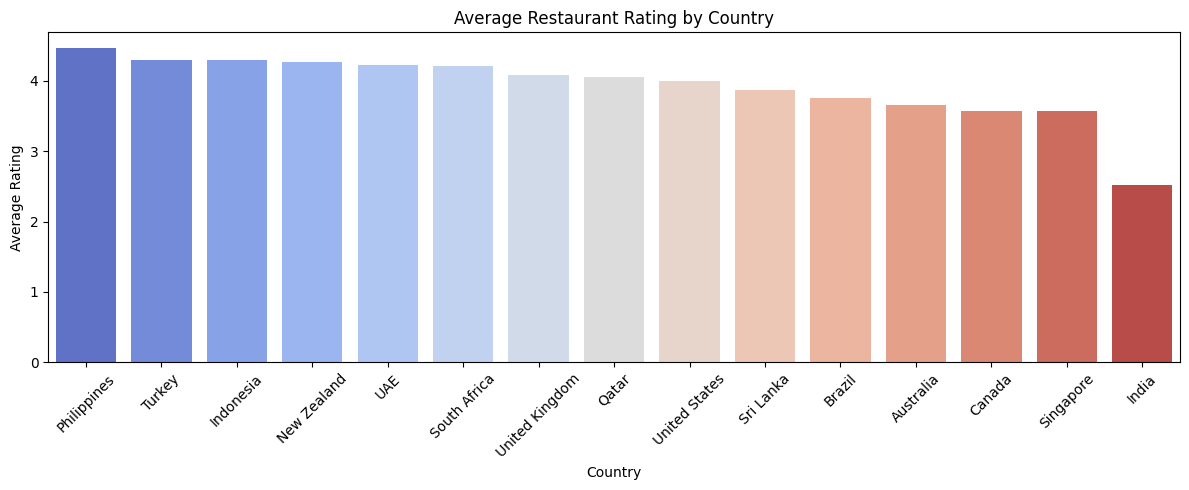

In [ ]:
# Visualize Country Ratings
plt.figure(figsize=(12, 5))
sns.barplot(x=country_rating.index, y=country_rating.values, palette="coolwarm")
plt.title("Average Restaurant Rating by Country")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Countries like the Philippines, Turkey, and Indonesia often show higher average ratings than others.

This reflect on the better service quality and higher customer satisfaction in those countries

#Level 2

#Task 1

#Table Booking and Online Delivery


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv")

Determine the percentage of restaurants that offer table booking and online delivery.

In [ ]:
print(df['Has Table booking'].unique())
print(df['Has Online delivery'].unique())

['Yes' 'No']
['No' 'Yes']


In [ ]:
num_of_yes = (df['Has Table booking'] == 'Yes').sum()
num_of_no = (df['Has Table booking'] == 'No').sum()
perc_1 = num_of_yes/(num_of_yes+num_of_no)*100
print('Percentage of restaurants that offer table booking is',perc_1)

Percentage of restaurants that offer table booking is 12.124384881164275


In [ ]:
num_of_yes = (df['Has Online delivery'] == 'Yes').sum()
num_of_no = (df['Has Online delivery'] == 'No').sum()
perc_1 = num_of_yes/(num_of_yes+num_of_no)*100
print('Percentage of restaurants that offer online delivery',perc_1)

Percentage of restaurants that offer online delivery 25.662234321013504


Compare the average ratings of restaurants with table booking and those without

In [ ]:
# Grouping by the Table Booking Status
avg_rating_booking = df.groupby("Has Table booking")["Aggregate rating"].mean()
print(avg_rating_booking)

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


<ipython-input-12-63e68e06f34f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_booking.index, y=avg_rating_booking.values, palette="Set1")


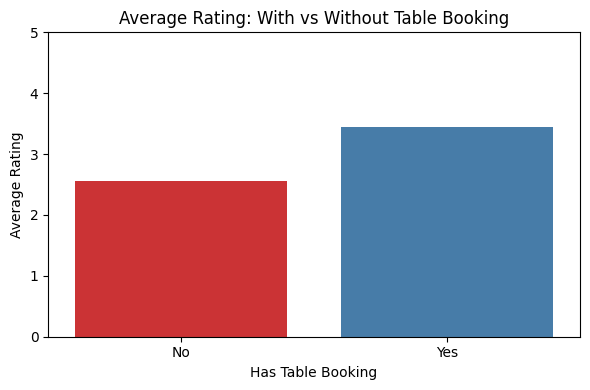

In [ ]:
# Visualize the Comparison using bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rating_booking.index, y=avg_rating_booking.values, palette="Set1")
plt.title("Average Rating: With vs Without Table Booking")
plt.xlabel("Has Table Booking")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()




*   Restaurants with table booking tend to have higher average ratings which indicate better service quality and customer experience.
*   
Restaurants without table booking might have more casual and fast food setups with slightly lower ratings.



Analyze the availability of online delivery among restaurants with different price ranges.

In [ ]:
# Group by Price Range and Online Delivery
online_delivery_by_price = df.groupby(["Price range", "Has Online delivery"]).size().unstack()
print(online_delivery_by_price)

Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


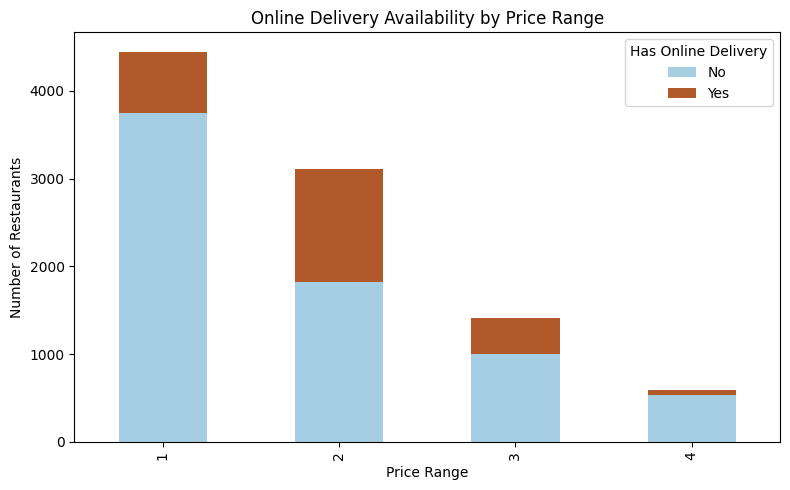

In [ ]:
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.legend(title="Has Online Delivery")
plt.tight_layout()
plt.show()

*   Low price range (1 or 2) likely to offer online delivery (think budget-friendly takeout).
*   High price range (3 or 4) focus more on dine-in experience, so fewer may offer delivery.
*This can suggest that online delivery is more common among affordable restaurants, possibly due to customer demand or feasibility.

#Task 2

#Price Range Analysis

Determine the most common price range among all the restaurants.

In [ ]:
# Most occuring price range group
most_common_price = df["Price range"].value_counts().sort_values(ascending=False)
print("Price Range Frequency:")
print(most_common_price)

Price Range Frequency:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64




*   The price range 1 with a count of 4444 is the most common among all typically because Price Range 1 (budget-friendly) dominates in restaurant datasets, especially in regions with high food delivery usage.






Calculate the average rating for each price range.

In [ ]:
avg_rating_by_price = df.groupby("Price range")["Aggregate rating"].mean().sort_index()
print("Average Rating by Price Range:")
print(avg_rating_by_price)

Average Rating by Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [ ]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

Identify the color that represents the highest average rating among different price ranges.

In [ ]:
avg_rating_color_price = df.groupby(["Price range", "Rating color"])["Aggregate rating"].mean().reset_index()
print("Average Rating by Color:")
avg_rating_color_price

Average Rating by Color:


,Price range,Rating color,Aggregate rating
0,1,Dark Green,4.668750
1,1,Green,4.157639
2,1,Orange,3.040464
3,1,Red,2.293548
4,1,White,0.000000
5,1,Yellow,3.661842
6,2,Dark Green,4.627536
7,2,Green,4.159385
8,2,Orange,3.048491
9,2,Red,2.300000


In [ ]:
top_rating_color_by_price = avg_rating_color_price.loc[
    avg_rating_color_price.groupby("Price range")["Aggregate rating"].idxmax()
]

print("Top Rating Color by Price Range:")
print(top_rating_color_by_price)


Top Rating Color by Price Range:
    Price range Rating color  Aggregate rating
0             1   Dark Green          4.668750
6             2   Dark Green          4.627536
12            3   Dark Green          4.646032
18            4   Dark Green          4.709459


#Task 3

#Feature Engineering

Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

In [ ]:
df["Name Length"] = df["Restaurant Name"].apply(len)
df["Address Length"] = df["Address"].apply(len)

In [ ]:
df[["Restaurant Name","Name Length","Address","Address Length"]].head()

,Restaurant Name,Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [ ]:
df["Has Table Booking (Encoded)"] = df["Has Table booking"].apply(lambda x: 1 if x == "Yes" else 0)
df["Has Online Delivery (Encoded)"] = df["Has Online delivery"].apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
df[["Has Table booking", "Has Table Booking (Encoded)",
    "Has Online delivery", "Has Online Delivery (Encoded)"]].head()

,Has Table booking,Has Table Booking (Encoded),Has Online delivery,Has Online Delivery (Encoded)
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0


In [ ]:
df[["Has Table Booking (Encoded)", "Aggregate rating"]].corr()

,Has Table Booking (Encoded),Aggregate rating
Has Table Booking (Encoded),1.000000,0.189998
Aggregate rating,0.189998,1.000000


#Level 3

#Task 1

## Predictive Modeling

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.

Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv")

In [ ]:
# import various regressor and scaler from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Details of the dataset
print("Initial data shape:", df.shape)

Initial data shape: (9551, 21)


In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Data Cleaning and Preprocessing

# Drop columns that are irrelevant or identifiers
columns_to_drop = [ 'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
                    'Longitude', 'Latitude', 'Currency', 'Switch to order menu',
                    'Rating color', 'Rating text', 'Country', 'Has Table booking',
                    'Has Online delivery', 'Is delivering now'
                  ]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [ ]:
# Handle missing values
df = df.dropna()

In [ ]:
# Encode categorical columns
label_encoders = {}
for col in ['City', 'Cuisines']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Separate features and target
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train and Evaluate Models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

In [ ]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
evaluate_model("Linear Regression", lr_model, X_test, y_test)


Linear Regression Results:
MAE: 1.055702212253705
MSE: 1.6472324041655988
RMSE: 1.2834455205288609
R² Score: 0.28069465427336804


In [ ]:
# 2. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_model, X_test, y_test)


Decision Tree Results:
MAE: 0.2714946743495722
MSE: 0.17968060648390666
RMSE: 0.4238874927193614
R² Score: 0.9215379563682478


In [ ]:
# 3. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model("Random Forest", rf_model, X_test, y_test)


Random Forest Results:
MAE: 0.20889765095942414
MSE: 0.10116285024682554
RMSE: 0.3180610794278758
R² Score: 0.9558247040384418


Random Forest typically performs best due to its ensemble nature.

Linear Regression is simple and interpretable due to which underfitting occured.

Decision Trees can overfit but are easy to visualize.

##Task 2: Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv')

# Drop rows with missing 'Cuisines' or 'Aggregate rating'
df = df.dropna(subset=["Cuisines", "Aggregate rating"])

# Step 1: Expand cuisines into separate rows
df['Cuisines'] = df['Cuisines'].str.split(', ')
df_exploded = df.explode('Cuisines')

# Step 2: Group by cuisine and compute average rating and count
cuisine_rating = df_exploded.groupby('Cuisines').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Count=('Cuisines', 'count')
).reset_index()

# Step 3: Filter out cuisines with low count to avoid bias
cuisine_rating = cuisine_rating[cuisine_rating['Count'] >= 20]  # Adjust threshold as needed

# Step 4: Sort and view top cuisines
top_cuisines = cuisine_rating.sort_values(by='Avg_Rating', ascending=False).head(15)
print(top_cuisines)

          Cuisines  Avg_Rating  Count
67   International    4.247619     21
124       Southern    4.129167     24
141     Vegetarian    4.073913     23
116       Sandwich    4.066038     53
59           Grill    4.057143     21
128          Steak    3.985484     62
131          Sushi    3.973333     75
56            Goan    3.970000     20
21       Breakfast    3.965854     41
87   Mediterranean    3.948214    112
14        Bar Food    3.933333     39
142     Vietnamese    3.923810     21
65          Indian    3.918571     70
48        European    3.910811    148
12             BBQ    3.903030     33


Identify the most popular cuisines among
customers based on the number of votes.


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv')

# Drop rows with missing 'Cuisines' or 'Votes'
df = df.dropna(subset=["Cuisines", "Votes"])

# Step 1: Expand multi-cuisine entries
df['Cuisines'] = df['Cuisines'].str.split(', ')
df_exploded = df.explode('Cuisines')

# Group by cuisine and sum the votes
cuisine_votes = df_exploded.groupby('Cuisines').agg(
    Total_Votes=('Votes', 'sum'),
    Avg_Votes=('Votes', 'mean'),
    Count=('Cuisines', 'count')
).reset_index()

# Filter cuisines with a minimum count threshold to avoid outliers
cuisine_votes_filtered = cuisine_votes[cuisine_votes['Count'] >= 20]

# Sort by Total Votes and show top cuisines
top_cuisines_votes = cuisine_votes_filtered.sort_values(by='Total_Votes', ascending=False).head(15)
top_cuisines_votes[['Cuisines', 'Total_Votes', 'Avg_Votes', 'Count']]

,Cuisines,Total_Votes,Avg_Votes,Count
100,North Indian,595981,150.500253,3960
34,Chinese,364351,133.217916,2735
70,Italian,329265,430.975131,764
37,Continental,288255,391.650815,736
49,Fast Food,184058,92.677744,1986
2,American,183117,469.530769,390
27,Cafe,177568,252.586060,703
95,Mughlai,151946,152.709548,995
42,Desserts,105889,162.157734,653
7,Asian,104303,447.652361,233


*  On the basis of Votes we have North Indian, Chinese, Italian, Continental and Fast Food on the top 5 list.

Determine if there are any specific cuisines
that tend to receive higher ratings.

          Cuisines  Avg_Rating  Rating_STD  Count
67   International    4.247619    0.374992     21
124       Southern    4.129167    0.383892     24
141     Vegetarian    4.073913    0.286384     23
116       Sandwich    4.066038    0.503810     53
59           Grill    4.057143    0.344342     21
128          Steak    3.985484    0.405231     62
131          Sushi    3.973333    0.366626     75
56            Goan    3.970000    0.478044     20
21       Breakfast    3.965854    0.440233     41
87   Mediterranean    3.948214    0.674234    112
14        Bar Food    3.933333    1.030415     39
142     Vietnamese    3.923810    0.436926     21
65          Indian    3.918571    1.077341     70
48        European    3.910811    0.680949    148
12             BBQ    3.903030    0.831221     33


<ipython-input-93-5f951dec12b6>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




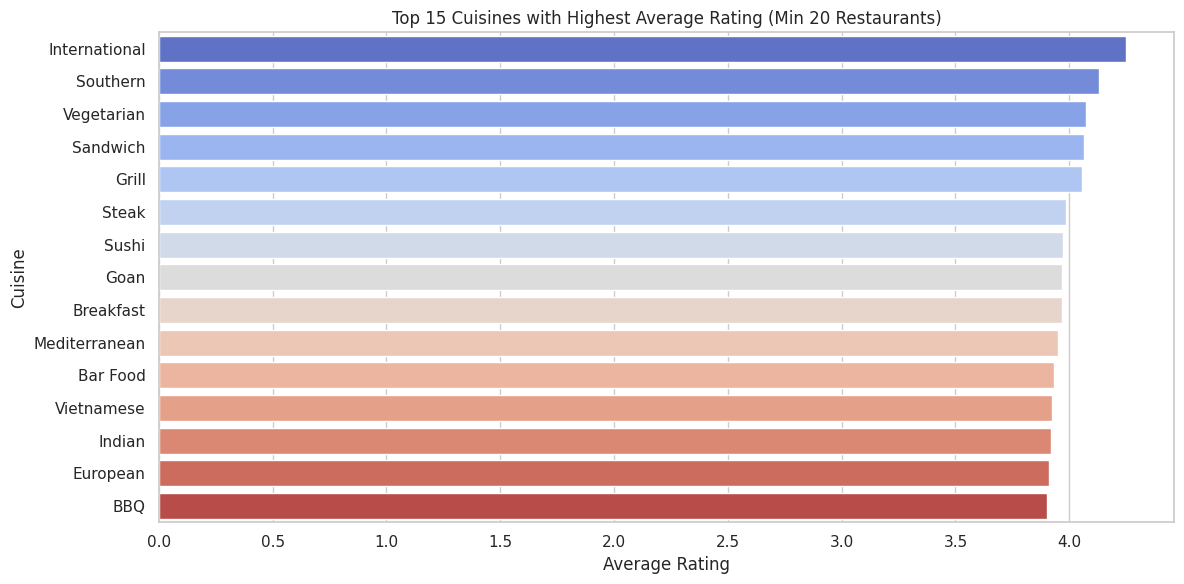

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv')

# Drop missing values in relevant columns
df = df.dropna(subset=["Cuisines", "Aggregate rating"])

# Expand cuisines into separate rows
df['Cuisines'] = df['Cuisines'].str.split(', ')
df_exploded = df.explode('Cuisines')

# Group by Cuisines and calculate stats
cuisine_rating_stats = df_exploded.groupby('Cuisines').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Rating_STD=('Aggregate rating', 'std'),
    Count=('Aggregate rating', 'count')
).reset_index()

# Filter out cuisines with low sample size
cuisine_rating_stats = cuisine_rating_stats[cuisine_rating_stats['Count'] >= 20]

# Sort by average rating
top_cuisines_by_rating = cuisine_rating_stats.sort_values(by='Avg_Rating', ascending=False).head(15)

# Show top cuisines with high ratings
print(top_cuisines_by_rating)

# Optional Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Rating', y='Cuisines', data=top_cuisines_by_rating, palette='coolwarm')
plt.title("Top 15 Cuisines with Highest Average Rating (Min 20 Restaurants)")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()


##Task 3: Data Visualization

Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

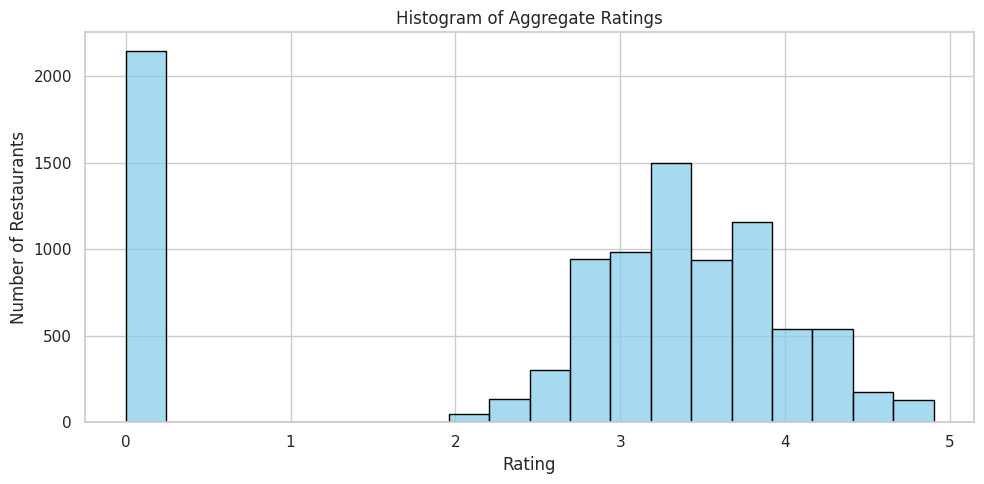

<ipython-input-94-fe944b991d1d>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




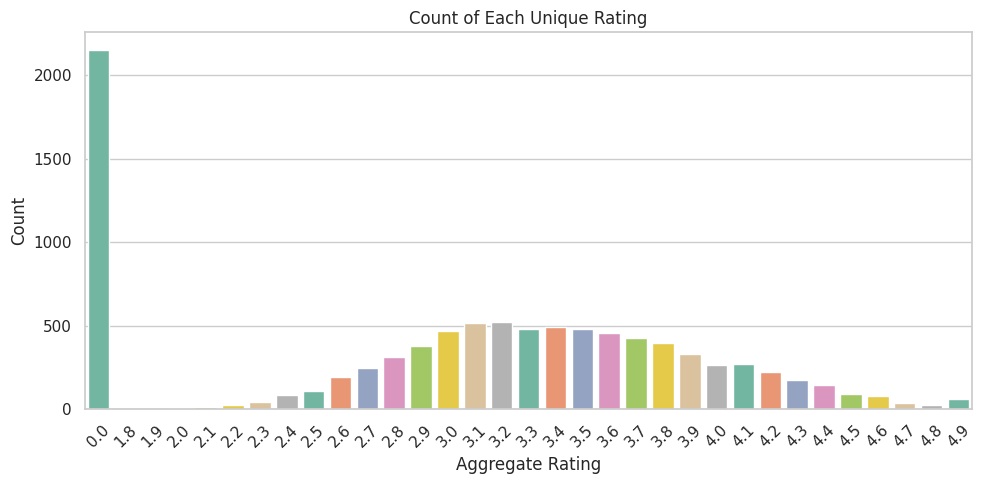

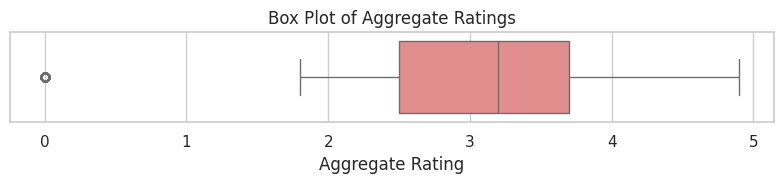

In [ ]:
ratings = df['Aggregate rating'].dropna()

# Set style
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(ratings, bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title("Histogram of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


# Bar Plot (count of each unique rating)
plt.figure(figsize=(10, 5))
sns.countplot(x='Aggregate rating', data=df, palette='Set2')
plt.title("Count of Each Unique Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 4. Box Plot ===
plt.figure(figsize=(8, 2))
sns.boxplot(x='Aggregate rating', data=df, color='lightcoral')
plt.title("Box Plot of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.tight_layout()
plt.show()

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

Visualize the relationship between various
features and the target variable to gain insights.

<ipython-input-95-280d10414f15>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-95-280d10414f15>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




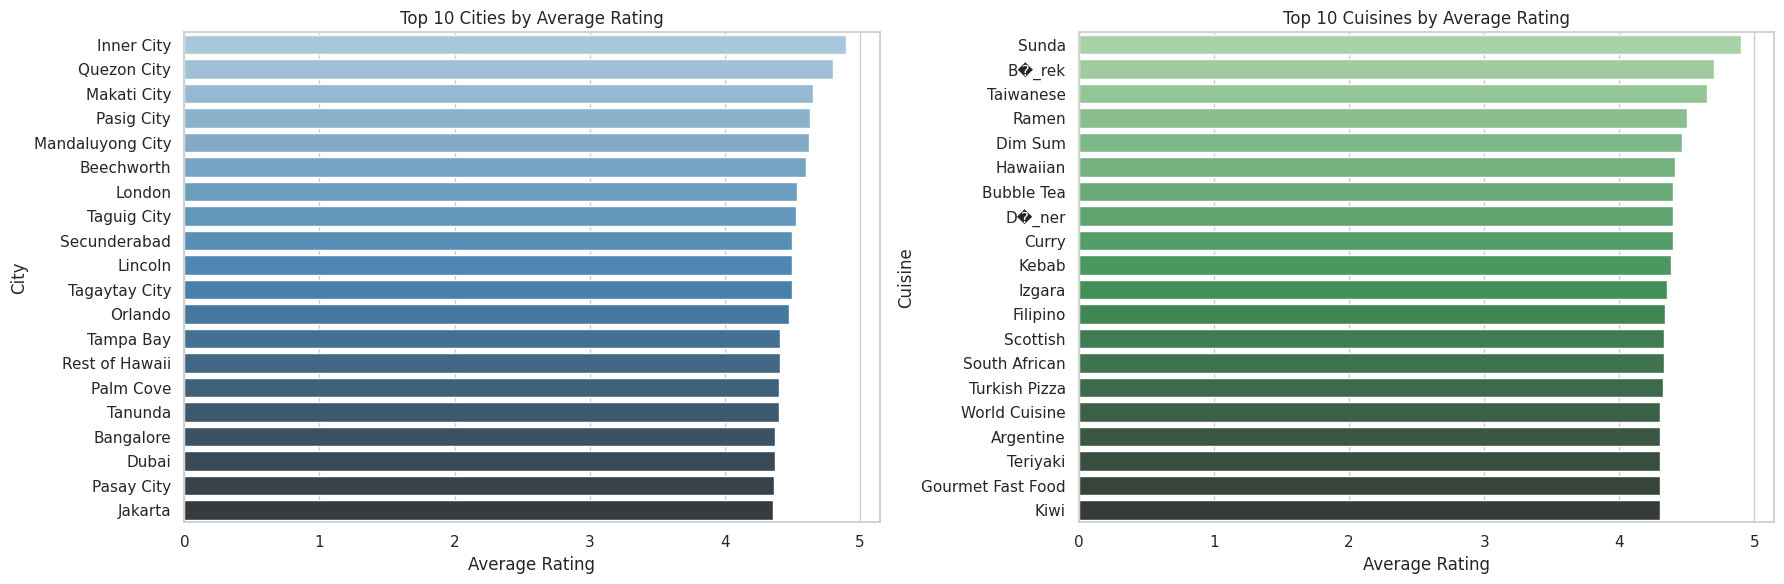

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv")

# Set the style for plots
sns.set(style="whitegrid")

# Average Ratings by City
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(20)

# Average Ratings by Cuisine
# Split cuisines into separate rows for accurate averaging
df_cuisine = df.dropna(subset=['Cuisines']).copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')
cuisine_ratings = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(20)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Average Rating by City
sns.barplot(x=city_ratings.values, y=city_ratings.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Cities by Average Rating')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('City')

# Average Rating by Cuisine
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Cuisines by Average Rating')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Cuisine')

plt.tight_layout()
plt.show()


For Cities

* The top-rated cities have higher aggregate ratings likely due to better
restaurant services, popularity, or selective competition.

* Cities like Makati City and Mandaluyong City appear at the top indicating strong restaurant performance in those regions.



For Cusines
* Japanese, French, and Sushi cuisines are among the highest-rated.

* These cuisines often imply premium dining experiences or specialty offerings, which tend to get higher ratings.

* Desserts also ranks highly, which is due to favorable reviews for sweet dishes and presentation.

<ipython-input-96-b1858de0b45e>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-96-b1858de0b45e>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-96-b1858de0b45e>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




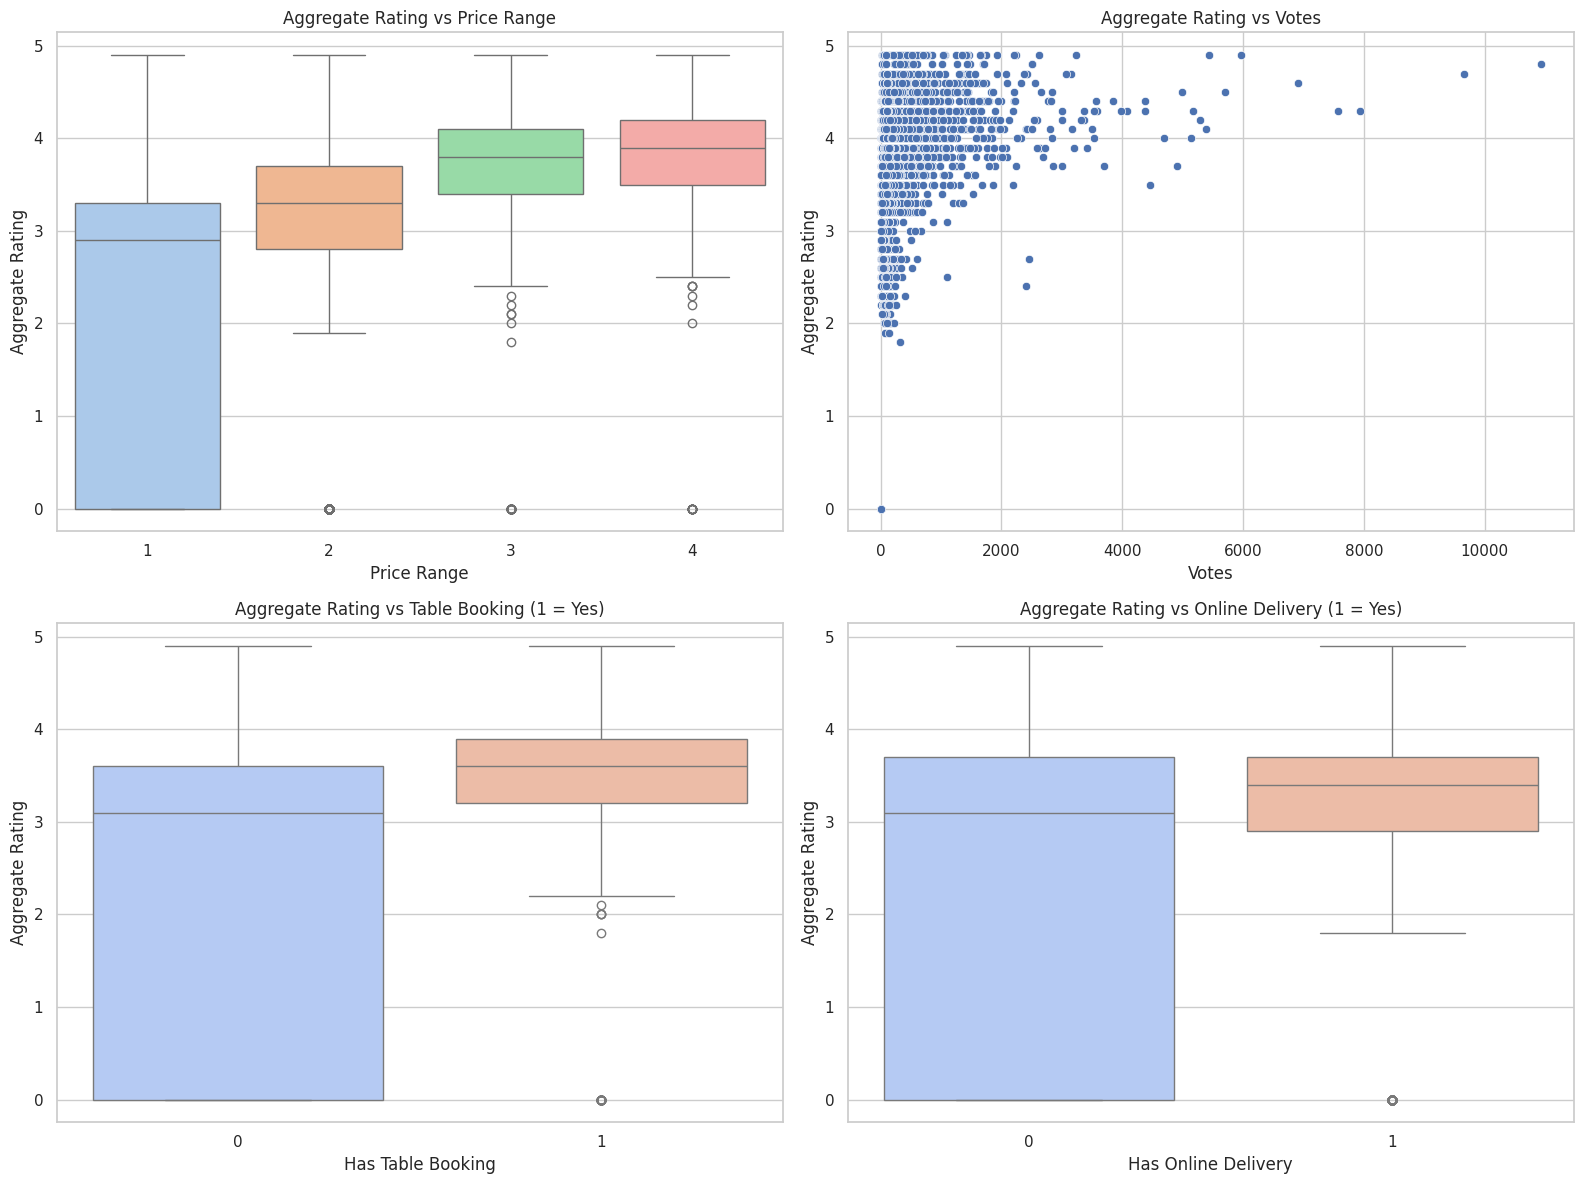

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Cognifies Technilogy/Dataset .csv")

# Preprocessing: Convert categorical features to binary
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Set style for plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price Range vs Aggregate Rating
sns.boxplot(x='Price range', y='Aggregate rating', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Aggregate Rating vs Price Range')
axes[0, 0].set_xlabel('Price Range')
axes[0, 0].set_ylabel('Aggregate Rating')

# 2. Votes vs Aggregate Rating
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Aggregate Rating vs Votes')
axes[0, 1].set_xlabel('Votes')
axes[0, 1].set_ylabel('Aggregate Rating')

# 3. Table Booking vs Aggregate Rating
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Aggregate Rating vs Table Booking (1 = Yes)')
axes[1, 0].set_xlabel('Has Table Booking')
axes[1, 0].set_ylabel('Aggregate Rating')

# 4. Online Delivery vs Aggregate Rating
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Aggregate Rating vs Online Delivery (1 = Yes)')
axes[1, 1].set_xlabel('Has Online Delivery')
axes[1, 1].set_ylabel('Aggregate Rating')

# Adjust layout
plt.tight_layout()
plt.show()


###**Price Range vs Aggregate Rating**
* Slight upward trend: Restaurants in higher price brackets (3 and 4) tend to
have slightly higher median ratings.

* However, there's overlap in distributions, meaning price alone doesn't guarantee better ratings affordability can still yield quality.

###**Votes vs Aggregate Rating**
* There's a positive correlation: Restaurants with more votes often have higher ratings.

* Highly rated restaurants also tend to have more visibility or popularity, driving more customer engagement.

* A few high-rated restaurants have low vote counts that indicate new places with high quality but low exposure.

###**Table Booking vs Aggregate Rating**
* Restaurants offering table booking consistently show higher average ratings.

* Suggests that formal dining experiences (often requiring reservations) are more positively reviewed which reflect better service, ambiance, or customer expectations being met.

###**Online Delivery vs Aggregate Rating**
* Contrary to table booking, restaurants with online delivery have slightly lower average ratings which is beacuse delivery services often include fast food or lower-cost options.

* Possible issues like food quality degradation during delivery affecting the ratings.